In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('books.csv',on_bad_lines = 'skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
df.describe()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [3]:
#finding null values:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
df.describe()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


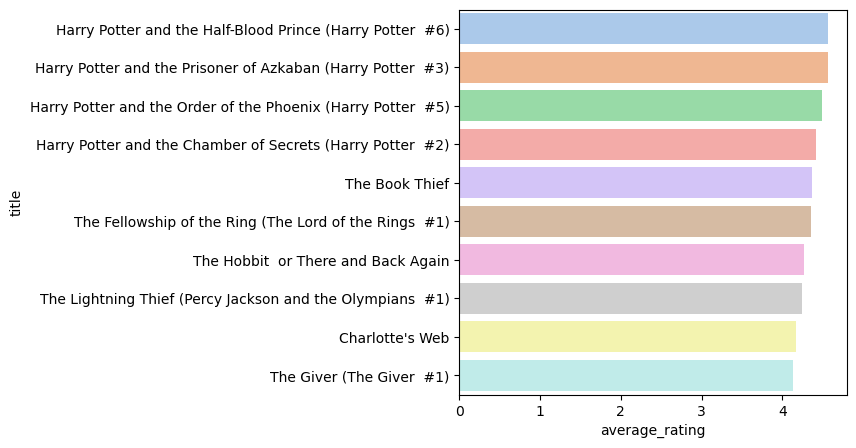

In [9]:
# Select rows from the DataFrame where 'ratings_count' is greater than 1000000
top_ten = df[df['ratings_count'] > 1000000]

# Sort the selected rows based on 'average_rating' in descending orde5r
top_ten_sorted = top_ten.sort_values(by='average_rating', ascending=False)

# Create a new figure with a size of 10x10 inches
plt.figure(figsize=(5, 5))

# Select the top 10 rows from the sorted DataFrame based on 'average_rating'
data = top_ten_sorted.head(10)

sns.barplot(x="average_rating", y="title", data=data, palette='pastel')
plt.show()


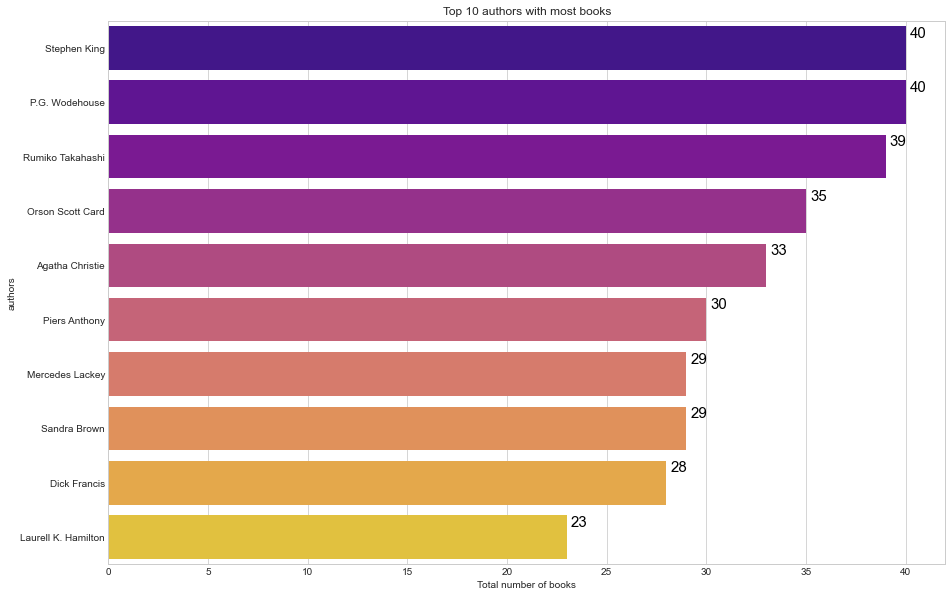

In [6]:
#Top 10 authors

# Group the DataFrame by 'authors' and count the number of books for each author
most_books = df.groupby('authors')['title'].count().reset_index()

# Sort the grouped data by the count of books in descending order and select the top 10
most_books_sorted = most_books.sort_values('title', ascending=False).head(10)

# Set the 'authors' column as the index for better readability in the plot
most_books_sorted = most_books_sorted.set_index('authors')

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_books_sorted['title'], y=most_books_sorted.index, palette='plasma')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

# Add annotations (total number of books) to each bar in the plot
totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # Display the count of books next to each bar, with a slight offset for better visibility
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')

plt.show()


<Figure size 1080x720 with 0 Axes>

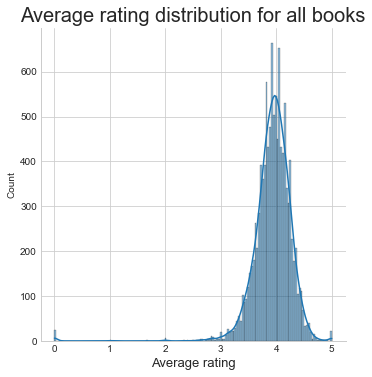

In [7]:
#Average rating distribution:

# Convert 'average_rating' to float
df['average_rating'] = df['average_rating'].astype(float)

# Create a figure-level distribution plot
fig = plt.figure(figsize=[15, 10])
sns.displot(df['average_rating'], kde=True)
plt.title('Average rating distribution for all books', fontsize=20)
plt.xlabel('Average rating', fontsize=13)
plt.show()


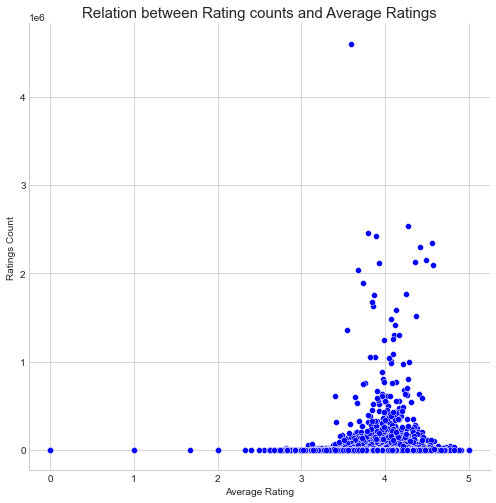

In [8]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'blue', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1080x720 with 0 Axes>

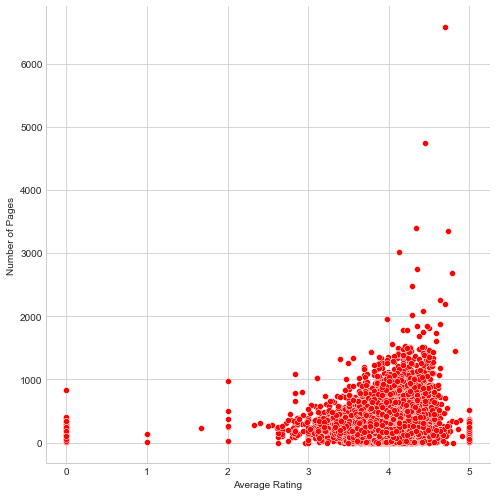

In [9]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [10]:
df2 = df.copy()

#splitting

df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [11]:
#binary conversion using dummy method
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [12]:
language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
rating_df

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11118,0,0,0,0,1
11119,0,0,0,0,1
11120,0,0,0,1,0
11121,0,0,0,1,0


In [14]:
#concatenating 
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)
features

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.06,156
11119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.08,783
11120,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.96,820
11121,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.72,769


In [15]:
#Scaling the values
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

#Building the model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [16]:
def BookRecommender(book_name):
    # Initialize an empty list to store recommended book names
    book_list_name = []
    
    # Find the index of the input book_name in the DataFrame
    book_id = df2[df2['title'] == book_name].index
    
    # Extract the first (and only) element from the index array
    book_id = book_id[0]
    
    # Iterate through the indices of the k-nearest neighbors for the input book_id
    for newid in idlist[book_id]:
        # Append the title of each recommended book to the book_list_name
        book_list_name.append(df2.loc[newid].title)
    
    # Return the list of recommended book names
    return book_list_name

# Call the BookRecommender function with a specific book name
BookNames = BookRecommender('Are You Afraid of the Dark?')

# Display the list of recommended book names
BookNames[1:]


['The Virgin Blue',
 "Hallowe'en Party (Hercule Poirot  #39)",
 'Breathing Lessons',
 'Kitty and the Midnight Hour (Kitty Norville #1)',
 'Story of a Girl']

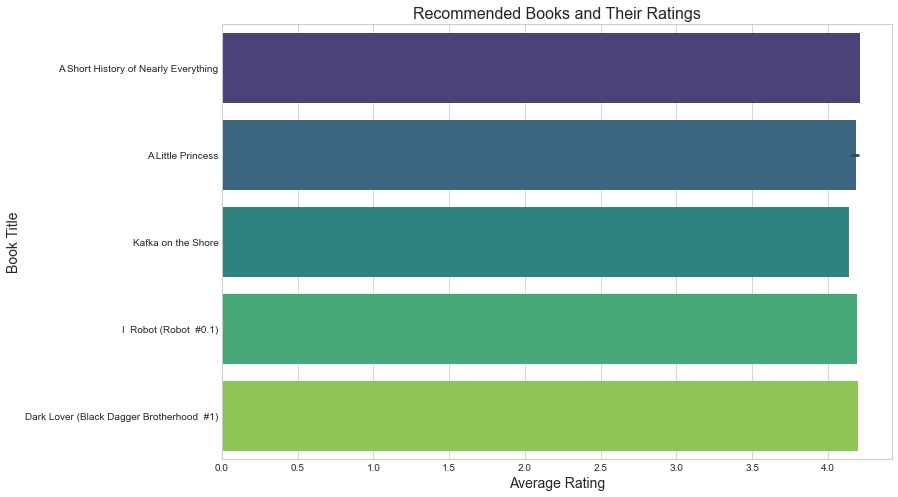

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Call the BookRecommender function with a specific book name
BookNames = BookRecommender('A Brief History of Time')

# Display the list of recommended book names (excluding the queried book itself)
recommended_books = BookNames[1:]

# Extract relevant information for the recommended books
recommended_books_info = df2[df2['title'].isin(recommended_books)][['title', 'average_rating', 'ratings_count']]

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for average ratings
sns.barplot(x='average_rating', y='title', data=recommended_books_info, palette='viridis')

# Set the title and labels
plt.title('Recommended Books and Their Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)

# Display the plot
plt.show()


In [18]:
import requests
import IPython.display as display
from IPython.display import Image, HTML

# Function to get book cover image from Google Books API
def get_book_cover(book_title):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    params = {"q": f"intitle:{book_title}"}
    response = requests.get(base_url, params=params)
    data = response.json()

    if "items" in data and data["items"]:
        image_link = data["items"][0]["volumeInfo"].get("imageLinks", {}).get("thumbnail", "")
        return image_link

    return None

# Call the BookRecommender function with a specific book name
BookNames = BookRecommender("Are You Afraid of the Dark?")

# Display the list of recommended book names (excluding the queried book itself)
recommended_books = BookNames[1:]

# Generate HTML to display book covers in a row
html_content = "<div style='display:flex; flex-wrap: wrap;'>"
for book_title in recommended_books:
    cover_url = get_book_cover(book_title)
    if cover_url:
        html_content += f"<img src='{cover_url}' style='margin: 5px; max-width: 150px; max-height: 200px;'>"

html_content += "</div>"

# Display the HTML content
display.display(HTML(html_content))


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('books.csv', on_bad_lines='skip')

# ... (previous code for data exploration and preprocessing)

# Concatenating 
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

# Split the features into X and y
X = features.drop('ratings_count', axis=1)  # Features
y = features['ratings_count']  # Target variable

# Binarize the target variable for classification (example: based on some threshold)
y_class = np.where(y > 4, 1, 0)

# Scaling the values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9689887640449438
